In [1]:
from scipy.stats import bernoulli, lognorm
from abtools.bayesian.special import LognormalARPUABModel
a_conv = bernoulli.rvs(0.05, size=5000)
b_conv = bernoulli.rvs(0.06, size=5000)
a_rev = lognorm.rvs(1.01, size=1000)
b_rev = lognorm.rvs(1.05, size=1000)
a = {'revenue': a_rev, 'conversion': a_conv}
b = {'revenue': b_rev, 'conversion': b_conv}
model = LognormalARPUABModel(a, b)
model.fit()


/usr/local/lib/python3.5/dist-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
/usr/local/lib/python3.5/dist-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


         Current function value: 5083.675656
         Iterations: 19
         Function evaluations: 65
         Gradient evaluations: 54


100%|██████████| 10000/10000 [00:05<00:00, 1839.88it/s]


In [2]:
import seaborn as sns
%matplotlib inline

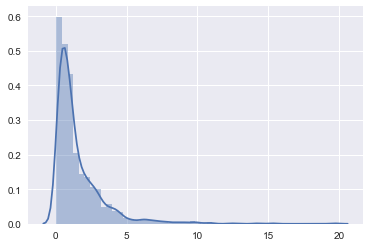

In [3]:
sns.distplot(a_rev)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f46f12a3b70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f46f0f96160>], dtype=object)

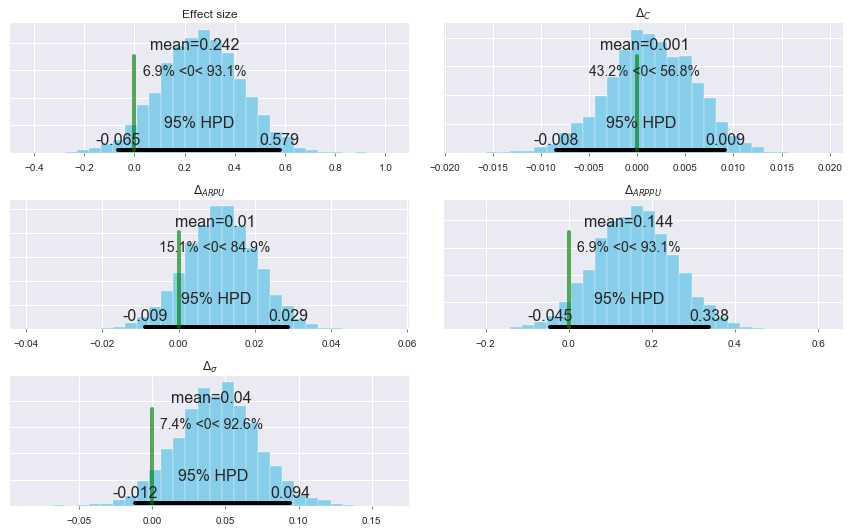

In [4]:
model.plot_deltas()

In [1]:
import pandas as pd
import scipy as sp

from abtools.bayesian import LognormalARPUABModel

%matplotlib inline

In [2]:
mu = 9
size = 300
delta_true = .015

arppu_a = pd.Series(sp.stats.wald.rvs(loc=mu, size=size, random_state=8228))
arppu_b = pd.Series(sp.stats.wald.rvs(loc=mu*(1+delta_true), size=size, random_state=8228))

print('ARPPU')
print('Mean: %.4f' % arppu_a.mean())
print('Mean: %.4f' % arppu_b.mean())
print('B больше A на %.4f = %d%%' % (arppu_b.mean()- arppu_a.mean(), 
                                    (arppu_b.mean()/arppu_a.mean()-1)*100))

p = .03
size = 10000
delta_true = .05

c_a = pd.Series(sp.stats.bernoulli.rvs(p=p, size=size, random_state=8228))
c_b = pd.Series(sp.stats.bernoulli.rvs(p=p*(1+delta_true), size=size, random_state=8228))

print('Mean: %.4f' % (c_a.mean()))
print('Mean: %.4f' % (c_b.mean()))
print('y2 больше y1 на %.4f = %d%%' % (c_b.mean()- c_a.mean(), (c_b.mean()/c_a.mean()-1)*100))

ARPPU
Mean: 9.9796
Mean: 10.1146
B больше A на 0.1350 = 1%
Mean: 0.0303
Mean: 0.0320
y2 больше y1 на 0.0017 = 5%


In [3]:
model = LognormalARPUABModel(
    {
        'A_conv': c_a, 
        'B_conv': c_b, 
        'A_rev': arppu_a, 
        'B_rev': arppu_b
    }
)

/usr/local/lib/python3.5/dist-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
/usr/local/lib/python3.5/dist-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


In [4]:
model.fit()

Optimization terminated successfully.
         Current function value: 4436.211067
         Iterations: 32
         Function evaluations: 46
         Gradient evaluations: 46


100%|██████████| 10000/10000 [00:06<00:00, 1583.47it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fefa9a9e8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f8feeb21780>], dtype=object)

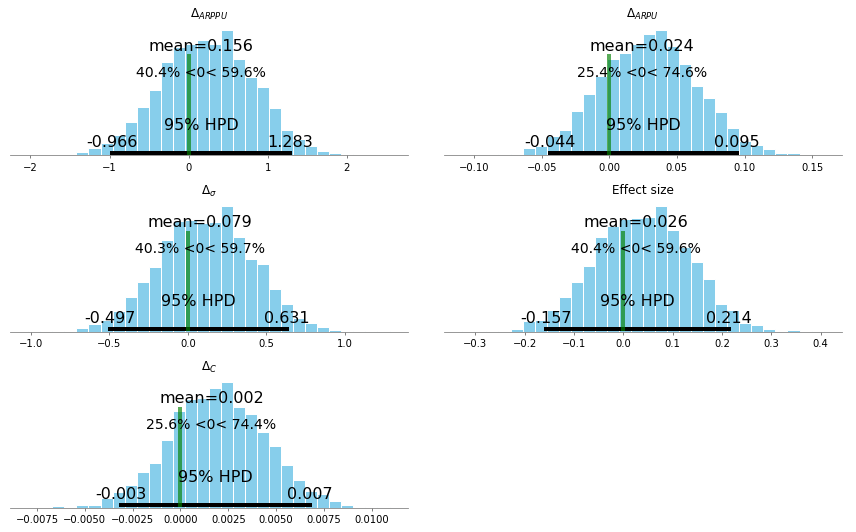

In [5]:
model.plot_deltas()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ff2e3f860>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f8ff16ea278>], dtype=object)

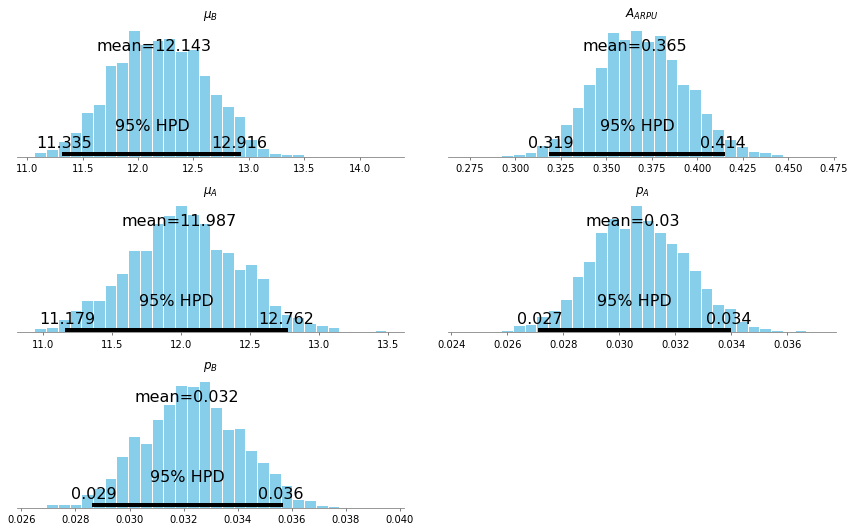

In [6]:
model.plot_params()

In [7]:
model.summary()

,mean,sd,mc_error,hpd_2.5,hpd_97.5
$\tau_A$,2.700537,0.017583,0.000390,2.666679,2.718645
$\mu_{ln(A)}$,2.298130,0.033948,0.000741,2.230007,2.362425
$\tau_B$,2.700959,0.018401,0.000436,2.663521,2.718663
$\mu_{ln(B)}$,2.311054,0.034648,0.000790,2.243860,2.374540
$\mu_A$,11.987482,0.407424,0.008824,11.179188,12.762203
$\mu_B$,12.143376,0.421654,0.009568,11.335182,12.915516
$A_{\sigma^2}$,36.545786,2.486444,0.053724,31.664508,41.281348
$B_{\sigma^2}$,37.506353,2.605081,0.058785,32.635561,42.403909
$p_A$,0.030483,0.001740,0.000049,0.027165,0.033916
$p_B$,0.032107,0.001824,0.000045,0.028671,0.035594
